In [33]:
from IPython.display import SVG, display
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import QED
from rdkit.Chem import RDConfig
import pandas as pd
import svgutils.transform as sg
import cairosvg
import sys
import os
sys.path.append('scripts/molecule_analysis/')
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))  # add the path to SA_Score
import sascorer

In [34]:

molecules = pd.read_csv('/Users/angr1/FYP/GPT/scripts/generated_molecules/curated_molecules.csv')
molecules = molecules.sort_values(by='QED', ascending=False)
print(molecules.shape)
print(molecules.head())

# take the x molecules with highest QED
x = 6
best_molecules = molecules.head(x)
print(best_molecules.head(6))
imgs = []

(55, 2)
                                      Smiles       QED
30  CC1=C(Nc2ccc(N(C)C)cc2)C(=O)c2ccccc2C1=O  0.942391
15       CCc1ccc(C(=O)Nc2ccc(N3CCCC3)nc2)cc1  0.938716
21    CC(=O)C1=C(c2ccccc2)Nc2ccc(N(C)C)cc2S1  0.919373
11        CC(C)C1OCCC1NC(=O)c1cc2ccccc2[nH]1  0.902308
41  CN(C)c1ccc(C2=C(C(=O)NCC3CCCO3)CCCC2)cc1  0.900825
                                         Smiles       QED
30     CC1=C(Nc2ccc(N(C)C)cc2)C(=O)c2ccccc2C1=O  0.942391
15          CCc1ccc(C(=O)Nc2ccc(N3CCCC3)nc2)cc1  0.938716
21       CC(=O)C1=C(c2ccccc2)Nc2ccc(N(C)C)cc2S1  0.919373
11           CC(C)C1OCCC1NC(=O)c1cc2ccccc2[nH]1  0.902308
41     CN(C)c1ccc(C2=C(C(=O)NCC3CCCO3)CCCC2)cc1  0.900825
14  CC(=O)Nc1ccc(NC2=C(Cl)C(=O)c3ccccc3C2=O)cc1  0.895000


[18:18:43] DEPRECATION WARNING: please use MorganGenerator


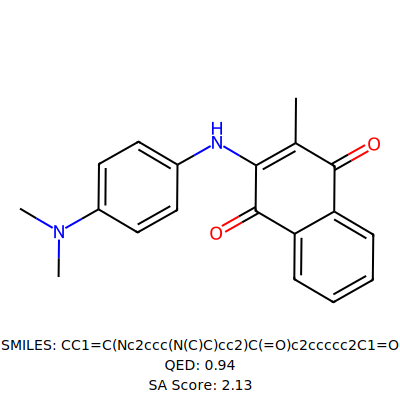

[18:18:43] DEPRECATION WARNING: please use MorganGenerator


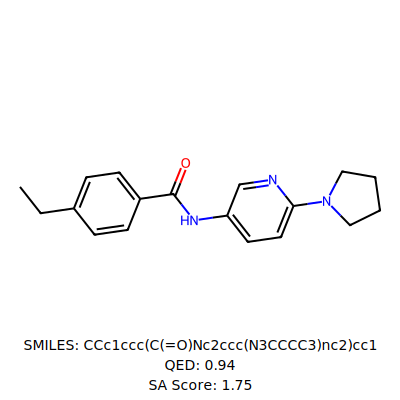

[18:18:43] DEPRECATION WARNING: please use MorganGenerator


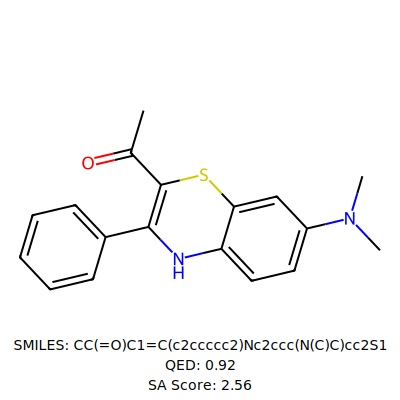

[18:18:43] DEPRECATION WARNING: please use MorganGenerator


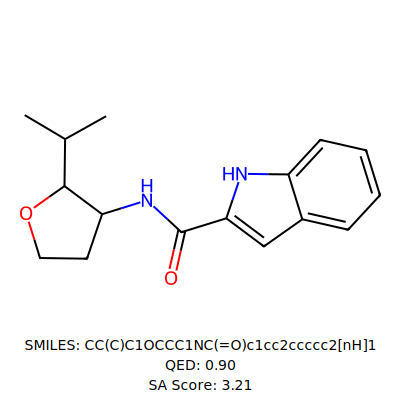

[18:18:43] DEPRECATION WARNING: please use MorganGenerator


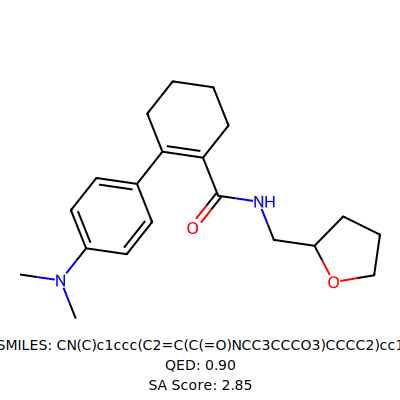

[18:18:43] DEPRECATION WARNING: please use MorganGenerator


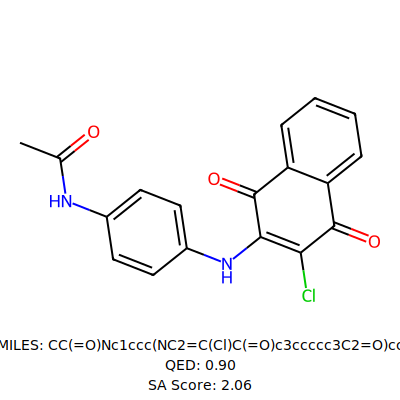

In [35]:
def draw_molecule(smiles):
    """Function to draw molecule with smiles strings, QED and SAScore, 
    based on code from: https://github.com/rdkit/rdkit/issues/2194
    """
    mol = Chem.MolFromSmiles(smiles)
    qed = QED.qed(mol)
    sa = sascorer.calculateScore(mol)
    rdDepictor.Compute2DCoords(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    # svg to text
    s = drawer.GetDrawingText()
    s = s.replace('svg:','')
    size = 14
    
    # add smiles to svg
    fig = sg.fromstring(s)
    smiles_str = sg.TextElement(200, 350, f'SMILES: {smiles}', size=size, 
                           font='sans-serif', anchor='middle', color='#000000')
    fig.append(smiles_str)
    
    # add qed to svg
    qed_str = sg.TextElement(200, 370, f'QED: {qed:.2f}', size=size, 
                           font='sans-serif', anchor='middle', color='#000000')
    fig.append(qed_str)
    
    # add sa score to svg
    sa_str = sg.TextElement(200, 390, f'SA Score: {sa:.2f}', size=size, 
                           font='sans-serif', anchor='middle', color='#000000')
    fig.append(sa_str)
    # Convert the SVG figure to a string
    svg_str = fig.to_str()
    display(SVG(svg_str))
    
    # save the svg to a file
    cairosvg.svg2png(bytestring=svg_str, write_to=f"/Users/angr1/FYP/GPT/scripts/generated_molecules/{qed:.4f}.png")

for mol in best_molecules['Smiles']:
    draw_molecule(mol)